# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow opencv-python mediapipe matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    '''
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    '''
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [15]:
draw_landmarks(frame, results)

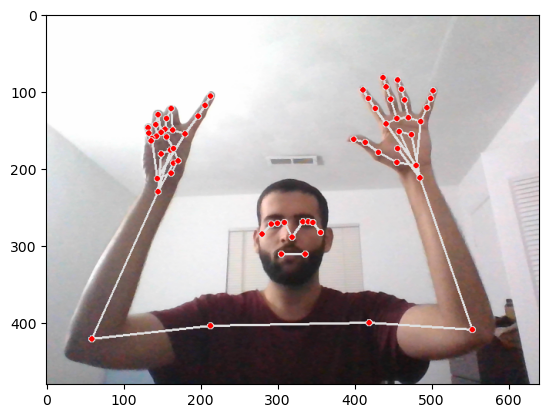

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [21]:
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [23]:

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
pose
rh

array([ 2.26106167e-01,  4.45119619e-01,  1.28654960e-07,  2.53894389e-01,
        4.30605203e-01, -2.24290788e-02,  2.68479526e-01,  3.97456884e-01,
       -3.33066024e-02,  2.59044796e-01,  3.62826705e-01, -4.30011041e-02,
        2.44413927e-01,  3.31911683e-01, -5.19979410e-02,  2.82280833e-01,
        3.23148578e-01, -1.53766805e-02,  3.08228493e-01,  2.76784420e-01,
       -3.09277121e-02,  3.22489381e-01,  2.46684521e-01, -4.23070379e-02,
        3.33304584e-01,  2.22140193e-01, -5.01931123e-02,  2.56999254e-01,
        3.14297736e-01, -1.37671363e-02,  2.53949136e-01,  2.55521864e-01,
       -3.84594277e-02,  2.44105026e-01,  2.81930745e-01, -5.00056036e-02,
        2.41465673e-01,  3.11994016e-01, -5.13373502e-02,  2.33534828e-01,
        3.19393992e-01, -1.43348593e-02,  2.27069438e-01,  2.70943701e-01,
       -3.87069099e-02,  2.22571611e-01,  2.99559861e-01, -4.24509719e-02,
        2.23861709e-01,  3.29903990e-01, -3.75488214e-02,  2.14515567e-01,
        3.36517602e-01, -

In [24]:
result_test = extract_keypoints(results)

In [25]:
result_test

array([ 4.99783427e-01,  6.02561891e-01, -7.61841893e-01,  9.99948084e-01,
        5.21717191e-01,  5.61440051e-01, -6.86093330e-01,  9.99913156e-01,
        5.32515764e-01,  5.62205374e-01, -6.85973287e-01,  9.99884605e-01,
        5.41911721e-01,  5.63717186e-01, -6.85680330e-01,  9.99901235e-01,
        4.83067572e-01,  5.62866747e-01, -6.78183436e-01,  9.99916613e-01,
        4.68755871e-01,  5.64928651e-01, -6.78011596e-01,  9.99895394e-01,
        4.56280887e-01,  5.66797078e-01, -6.78160548e-01,  9.99924481e-01,
        5.56477189e-01,  5.90985656e-01, -3.24212134e-01,  9.99895871e-01,
        4.37520355e-01,  5.93858421e-01, -2.71204650e-01,  9.99950707e-01,
        5.25155902e-01,  6.49484932e-01, -6.40720129e-01,  9.99910593e-01,
        4.76912975e-01,  6.49474859e-01, -6.27197266e-01,  9.99940753e-01,
        6.56082809e-01,  8.33890557e-01, -2.30144307e-01,  9.98452604e-01,
        3.33054125e-01,  8.42769265e-01, -9.45952982e-02,  9.97889519e-01,
        8.65428090e-01,  

In [26]:
np.save('0', result_test)

In [27]:
np.load('0.npy')

array([ 4.99783427e-01,  6.02561891e-01, -7.61841893e-01,  9.99948084e-01,
        5.21717191e-01,  5.61440051e-01, -6.86093330e-01,  9.99913156e-01,
        5.32515764e-01,  5.62205374e-01, -6.85973287e-01,  9.99884605e-01,
        5.41911721e-01,  5.63717186e-01, -6.85680330e-01,  9.99901235e-01,
        4.83067572e-01,  5.62866747e-01, -6.78183436e-01,  9.99916613e-01,
        4.68755871e-01,  5.64928651e-01, -6.78011596e-01,  9.99895394e-01,
        4.56280887e-01,  5.66797078e-01, -6.78160548e-01,  9.99924481e-01,
        5.56477189e-01,  5.90985656e-01, -3.24212134e-01,  9.99895871e-01,
        4.37520355e-01,  5.93858421e-01, -2.71204650e-01,  9.99950707e-01,
        5.25155902e-01,  6.49484932e-01, -6.40720129e-01,  9.99910593e-01,
        4.76912975e-01,  6.49474859e-01, -6.27197266e-01,  9.99940753e-01,
        6.56082809e-01,  8.33890557e-01, -2.30144307e-01,  9.98452604e-01,
        3.33054125e-01,  8.42769265e-01, -9.45952982e-02,  9.97889519e-01,
        8.65428090e-01,  

# 4. Setup Folders for Collection

In [28]:
# Path for exported data, numpy arrays

DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Smile', 'More', 'Help', 'Fine'])

# Thirty videos worth of data
no_sequences = 20

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [29]:
path2 = "/Users/New User/Desktop/AML/Action Detection trial/main trial" 
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(path2, DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [30]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(1, no_sequences+1):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [31]:
cap.release()
#cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [33]:
label_map = {label:num for num, label in enumerate(actions)}

In [34]:
label_map

{'Smile': 0, 'More': 1, 'Help': 2, 'Fine': 3}

In [35]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [36]:
np.array(sequences).shape

(80, 30, 258)

In [37]:
np.array(labels).shape

(80,)

In [38]:
X = np.array(sequences)

In [39]:
X.shape

(80, 30, 258)

In [40]:
y = to_categorical(labels).astype(int)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [42]:
y_test.shape

(24, 4)

In [43]:
del model1

NameError: name 'model1' is not defined

# 7. Build and Train LSTM Neural Network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
model1 = Sequential()
model1.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model1.add(LSTM(128, return_sequences=True, activation='relu'))
model1.add(LSTM(64, return_sequences=False, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(actions.shape[0], activation='softmax'))

In [47]:
#model1.compile(optimizer='AdaDelta', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#model1.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model1.fit(X_train, y_train, epochs=250, callbacks=[tb_callback])

Epoch 1/250
2/2 [==============================] - 5s 54ms/step - loss: 1.3715 - categorical_accuracy: 0.2500
Epoch 2/250
2/2 [==============================] - 0s 51ms/step - loss: 1.2593 - categorical_accuracy: 0.2679
Epoch 3/250
2/2 [==============================] - 0s 53ms/step - loss: 1.2094 - categorical_accuracy: 0.2500
Epoch 4/250
2/2 [==============================] - 0s 58ms/step - loss: 0.9731 - categorical_accuracy: 0.3929
Epoch 5/250
2/2 [==============================] - 0s 59ms/step - loss: 0.9958 - categorical_accuracy: 0.5179
Epoch 6/250
2/2 [==============================] - 0s 66ms/step - loss: 0.9276 - categorical_accuracy: 0.7679
Epoch 7/250
2/2 [==============================] - 0s 58ms/step - loss: 0.6761 - categorical_accuracy: 0.8571
Epoch 8/250
2/2 [==============================] - 0s 73ms/step - loss: 0.6991 - categorical_accuracy: 0.8571
Epoch 9/250
2/2 [==============================] - 0s 76ms/step - loss: 0.3318 - categorical_accuracy: 0.9821
Epoch 10/2

KeyboardInterrupt: 

In [49]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            82688     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 237,284
Trainable params: 237,284
Non-trai

# 8. Make Predictions

In [50]:
res = model1.predict(X_test)

1/1 [==============================] - 0s 467ms/step


In [51]:
actions[np.argmax(res[0])]

'Fine'

In [52]:
actions[np.argmax(y_test[0])]

'Fine'

# 9. Save Weights

In [53]:
model1.save('action.h5')

In [54]:
model1.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [55]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [56]:
yhat = model1.predict(X_test)

1/1 [==============================] - 0s 30ms/step


In [57]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [58]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[20,  0],
        [ 0,  4]],

       [[16,  1],
        [ 0,  7]],

       [[19,  0],
        [ 1,  4]],

       [[16,  0],
        [ 0,  8]]], dtype=int64)

In [59]:
accuracy_score(ytrue, yhat)

0.9583333333333334

# 11. Test in Real Time

In [60]:
from scipy import stats

In [61]:
colors = [(255,0,0), (60, 179, 113), (255, 165, 0), (0, 0, 255)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [72]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-20:]
        
        if len(sequence) == 20:
            res = model1.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (4,20), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 27ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Fine
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 28ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
More
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
More
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 30ms/step
Smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Smile
<class 'mediapipe.pyth

1/1 [==============================] - 0s 29ms/step
Fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Fine


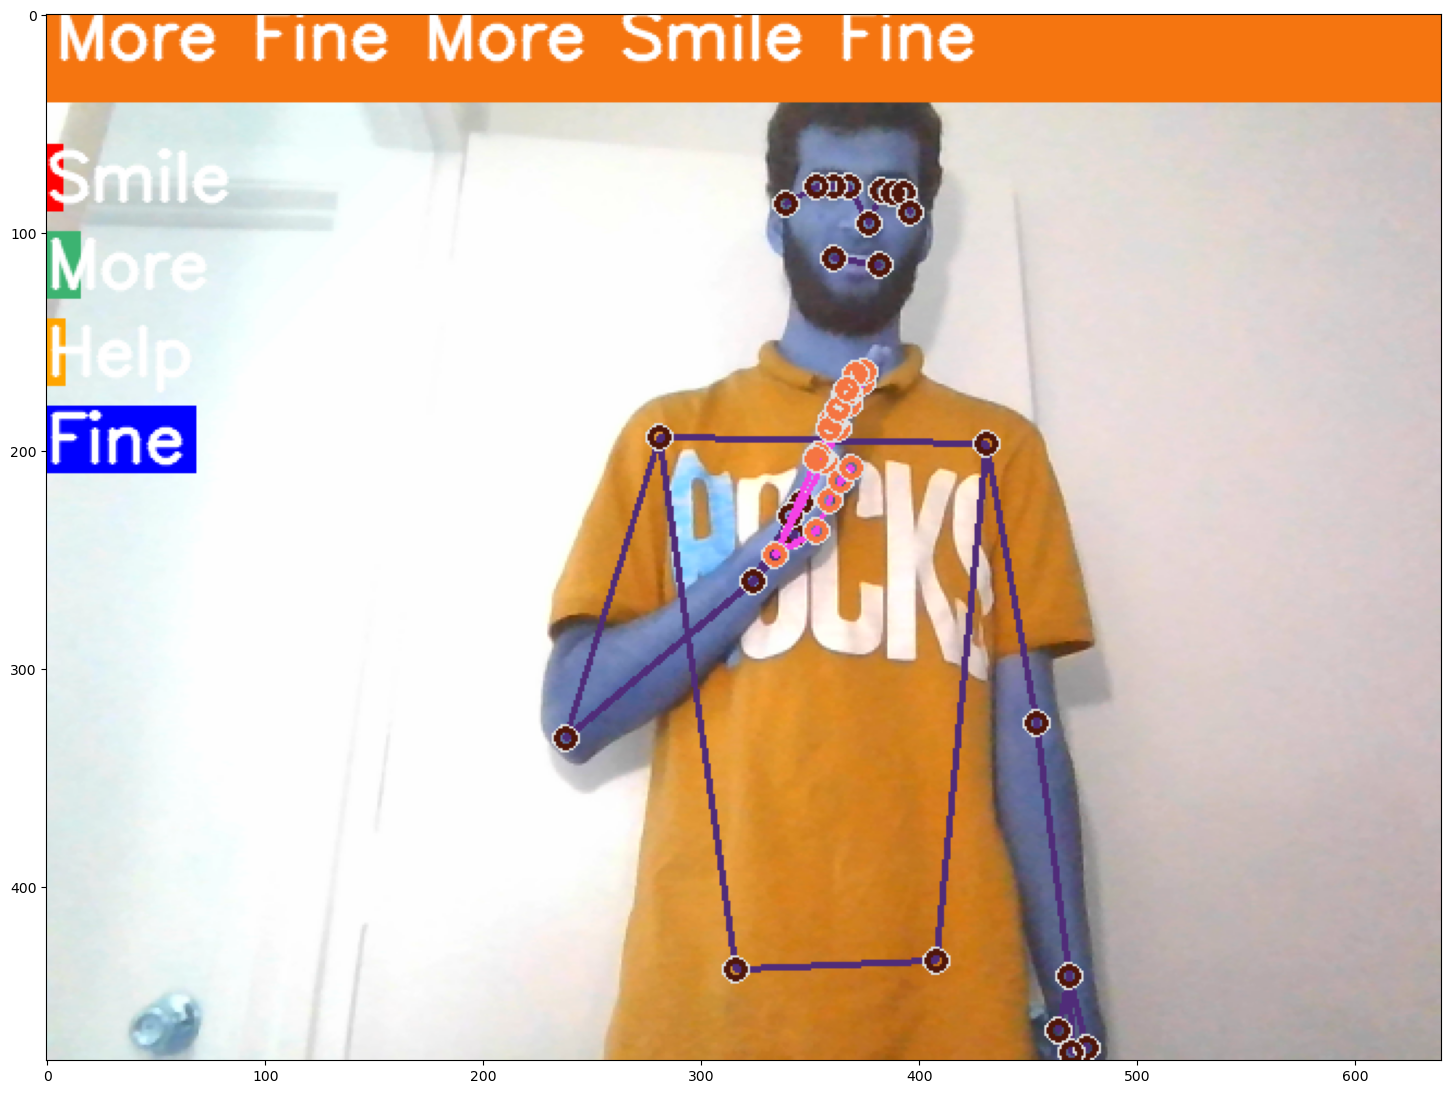

In [73]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))